In [1]:
#mount the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#To Download the github repo to google drive
!git clone https://gitfront.io/r/user-8948418/7v8eAoZ77xBD/KPTPACE-DLCV-Workshop.gitfront.git

Cloning into 'KPTPACE-DLCV-Workshop.gitfront'...
Checking out files: 100% (161/161), done.


In [3]:
#path of example directory
path = "/content/gdrive/MyDrive/DLCV_ASSIGNMENT1/"

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


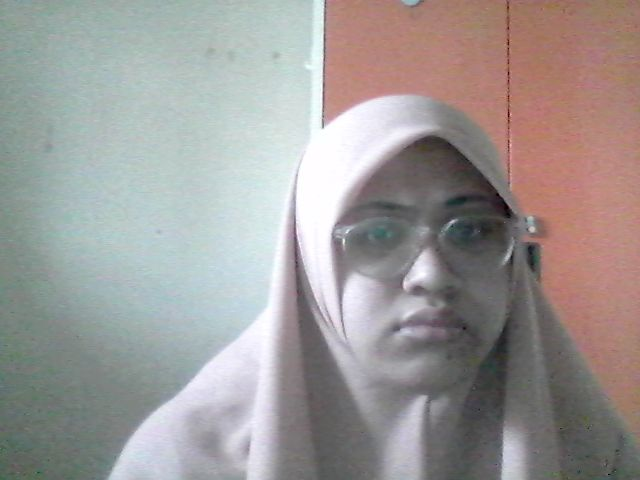

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [4]:
import cv2
# from PIL import Image
import matplotlib.pyplot as plt

In [5]:
print(cv2.__version__)

4.1.2


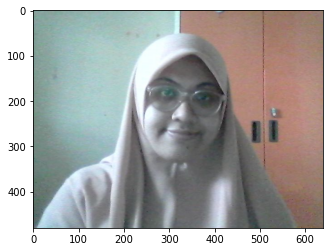

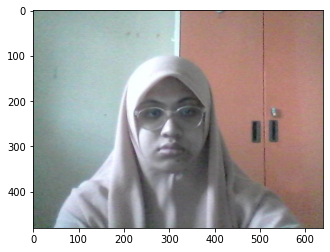

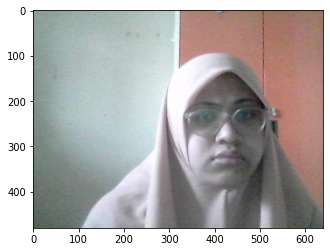

In [6]:
# Open image using openCV2
img1 = cv2.imread(path+"new1.jpg")
img2 = cv2.imread(path+"new2.jpg")
img3 = cv2.imread(path+"new3.jpg")
  
# Notice the COLOR_BGR2RGB which means that the color is
# converted from BGR to RGB
color_coverted1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
color_coverted2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
color_coverted3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
  
# using pillow
# pil_image = Image.fromarray(color_coverted)
# pil_image.show()

# using matplotlib
# plt.figure(figsize=(10,10))
plt.imshow(color_coverted1)
plt.show()
plt.imshow(color_coverted2)
plt.show()
plt.imshow(color_coverted3)
plt.show()

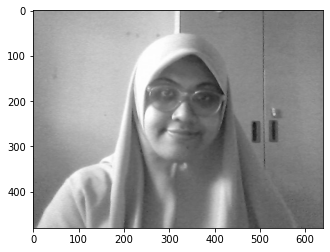

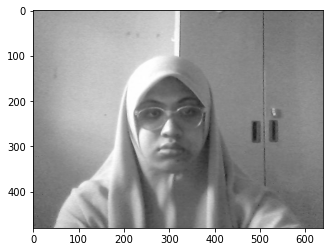

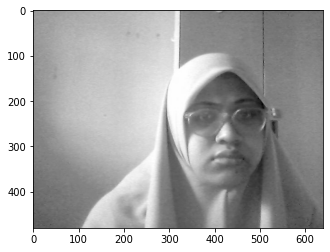

In [9]:
grayImage1 = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
grayImage2 = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
grayImage3 = cv2.cvtColor(img3,cv2.COLOR_RGB2GRAY)

# Displaying the converted image
color_coverted1 = cv2.cvtColor(grayImage1, cv2.COLOR_BGR2RGB)
color_coverted2 = cv2.cvtColor(grayImage2, cv2.COLOR_BGR2RGB)
color_coverted3 = cv2.cvtColor(grayImage3, cv2.COLOR_BGR2RGB)
# pil_img = Image.fromarray(color_coverted)
# pil_img.show()

plt.imshow(color_coverted1)
plt.show()
plt.imshow(color_coverted2)
plt.show()
plt.imshow(color_coverted3)
plt.show()

In [11]:
def displayImage(image):
    if len(image.shape)==3:
        color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(color_coverted)
        plt.show()
        
    else:
        plt.imshow(image, cmap="gray")
        plt.show()


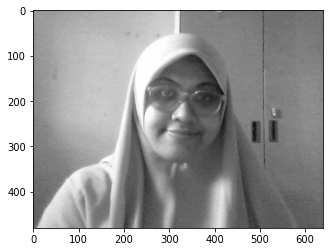

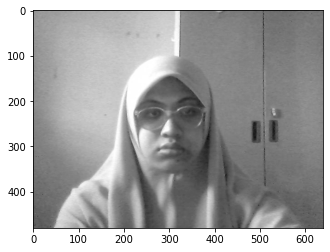

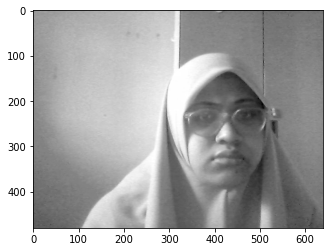

In [12]:
displayImage(grayImage1)
displayImage(grayImage2)
displayImage(grayImage3)

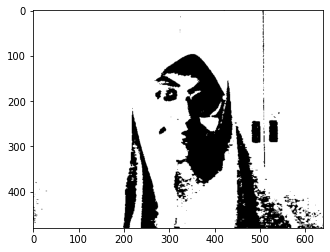

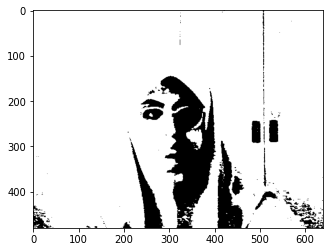

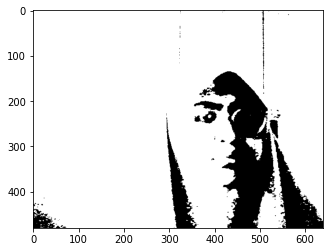

In [13]:
#Otsu thresholding
# ret, blackAndWhiteImage = cv2.threshold(grayImage,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

(thresh, blackAndWhiteImage1) = cv2.threshold(grayImage1, 100, 255, cv2.THRESH_BINARY)
(thresh, blackAndWhiteImage2) = cv2.threshold(grayImage2, 100, 255, cv2.THRESH_BINARY)
(thresh, blackAndWhiteImage3) = cv2.threshold(grayImage3, 100, 255, cv2.THRESH_BINARY)

displayImage(blackAndWhiteImage1)
displayImage(blackAndWhiteImage2)
displayImage(blackAndWhiteImage3)

In [16]:
kernel = np.ones((3,3), np.float32)/52 # box filter

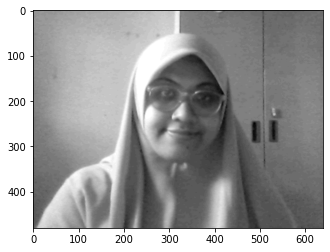

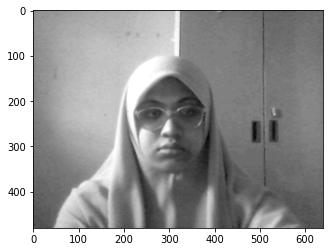

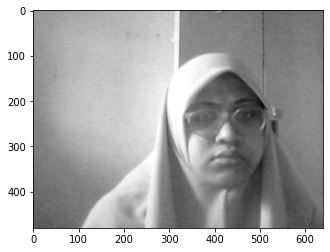

In [17]:
img1 = cv2.imread(path+"new1.jpg")
grayImage1 = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
convolvedImg1 = cv2.filter2D(grayImage1, -1,kernel)

img2 = cv2.imread(path+"new2.jpg")
grayImage2 = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
convolvedImg2 = cv2.filter2D(grayImage2, -1,kernel)

img3 = cv2.imread(path+"new3.jpg")
grayImage3 = cv2.cvtColor(img3,cv2.COLOR_RGB2GRAY)
convolvedImg3 = cv2.filter2D(grayImage3, -1,kernel)

# pil_img = Image.fromarray(convolvedImg)
# pil_img.show()

displayImage(convolvedImg1)
displayImage(convolvedImg2)
displayImage(convolvedImg3)

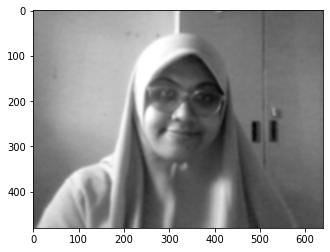

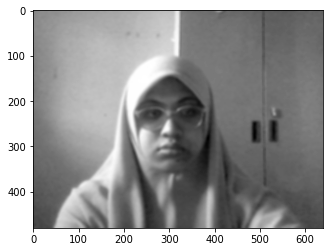

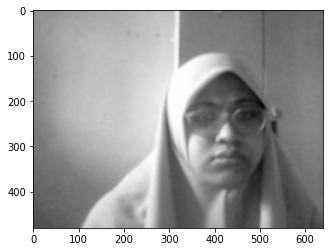

In [18]:
imgBlur1 = cv2.GaussianBlur(grayImage1,(7,7),5)
imgBlur2 = cv2.GaussianBlur(grayImage2,(7,7),5)
imgBlur3 = cv2.GaussianBlur(grayImage3,(7,7),5)
# median = cv2.medianBlur(img,5)
# blur = cv2.bilateralFilter(img,9,75,75)

# Displaying the converted image
# pil_img = Image.fromarray(imgBlur)
# pil_img.show()

displayImage(imgBlur1)
displayImage(imgBlur2)
displayImage(imgBlur3)

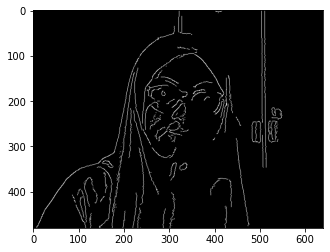

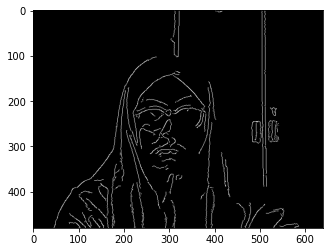

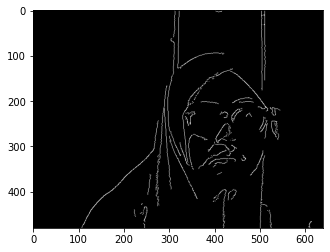

In [23]:
# canny
imgCanny1 = cv2.Canny(imgBlur1,20,50)
imgCanny2 = cv2.Canny(imgBlur2,20,50)
imgCanny3 = cv2.Canny(imgBlur3,20,50)

displayImage(imgCanny1)
displayImage(imgCanny2)
displayImage(imgCanny3)

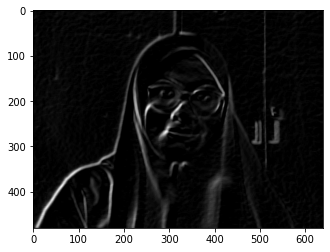

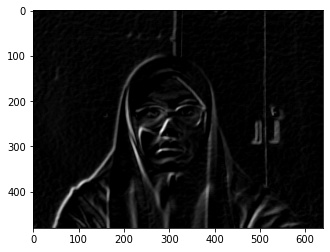

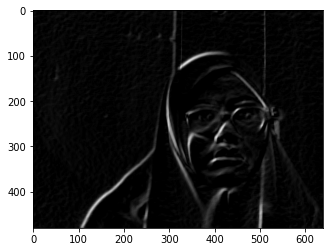

In [24]:
# sobel
sobelx_1 = cv2.Sobel(imgBlur1, cv2.CV_8U,1,0,ksize=3)
sobely_1 = cv2.Sobel(imgBlur1, cv2.CV_8U,0,1,ksize=3)
imgSobel1 = sobelx_1 + sobely_1

sobelx_2 = cv2.Sobel(imgBlur2, cv2.CV_8U,1,0,ksize=3)
sobely_2 = cv2.Sobel(imgBlur2, cv2.CV_8U,0,1,ksize=3)
imgSobel2 = sobelx_2 + sobely_2

sobelx_3 = cv2.Sobel(imgBlur3, cv2.CV_8U,1,0,ksize=3)
sobely_3 = cv2.Sobel(imgBlur3, cv2.CV_8U,0,1,ksize=3)
imgSobel3 = sobelx_3 + sobely_3

displayImage(imgSobel1)
displayImage(imgSobel2)
displayImage(imgSobel3)

In [25]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [26]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

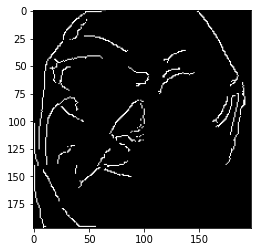

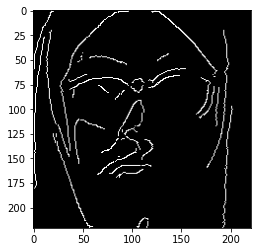

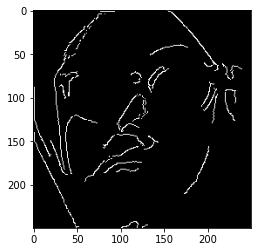

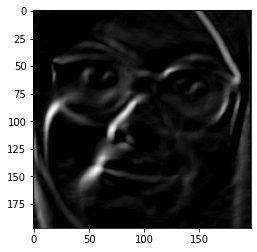

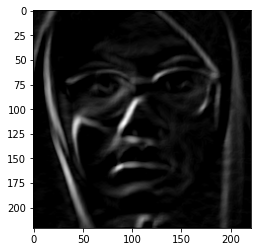

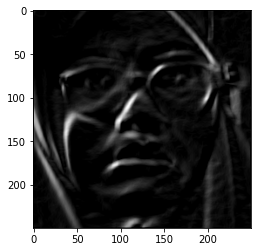

In [31]:
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
# initialze bounding box to empty
bbox = ''
count = 0 


# create transparent overlay for bounding box
bbox_array = np.zeros([480,640,4], dtype=np.uint8)
img1 = cv2.imread(path+"new1.jpg")
grayImage1 = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
convolvedImg1 = cv2.filter2D(grayImage1, -1,kernel)

img2 = cv2.imread(path+"new2.jpg")
grayImage2 = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
convolvedImg2 = cv2.filter2D(grayImage2, -1,kernel)

img3 = cv2.imread(path+"new3.jpg")
grayImage3 = cv2.cvtColor(img3,cv2.COLOR_RGB2GRAY)
convolvedImg3 = cv2.filter2D(grayImage3, -1,kernel)


# get face region coordinates
faces1 = face_cascade.detectMultiScale(grayImage1)
faces2 = face_cascade.detectMultiScale(grayImage2)
faces3 = face_cascade.detectMultiScale(grayImage3)
# get face bounding box for overlay
for (x,y,w,h) in faces1:
  bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

  (thresh, blackAndWhiteImage1) = cv2.threshold(grayImage1, 100, 255, cv2.THRESH_BINARY)
  
  imgBlur1 = cv2.GaussianBlur(grayImage1,(7,7),5)

  imgCanny1 = cv2.Canny(imgBlur1[y:y+h, x:x+w],20,70)

  sobelx_1 = cv2.Sobel(imgBlur1[y:y+h, x:x+w], cv2.CV_8U,1,0,ksize=3)
  sobely_1 = cv2.Sobel(imgBlur1[y:y+h, x:x+w], cv2.CV_8U,0,1,ksize=3)
  imgSobel1 = sobelx_1 + sobely_1


for (x,y,w,h) in faces2:
  bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

  (thresh, blackAndWhiteImage2) = cv2.threshold(grayImage2, 100, 255, cv2.THRESH_BINARY)

  imgBlur2 = cv2.GaussianBlur(grayImage2,(7,7),5)

  imgCanny2 = cv2.Canny(imgBlur2[y:y+h, x:x+w],20,70)

  sobelx_2 = cv2.Sobel(imgBlur2[y:y+h, x:x+w], cv2.CV_8U,1,0,ksize=3)
  sobely_2 = cv2.Sobel(imgBlur2[y:y+h, x:x+w], cv2.CV_8U,0,1,ksize=3)
  imgSobel2 = sobelx_2 + sobely_2


for (x,y,w,h) in faces3:
  bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

  (thresh, blackAndWhiteImage3) = cv2.threshold(grayImage3, 100, 255, cv2.THRESH_BINARY)

  imgBlur3 = cv2.GaussianBlur(grayImage3,(7,7),5)

  imgCanny3 = cv2.Canny(imgBlur3[y:y+h, x:x+w],20,70)

  sobelx_3 = cv2.Sobel(imgBlur3[y:y+h, x:x+w], cv2.CV_8U,1,0,ksize=3)
  sobely_3 = cv2.Sobel(imgBlur3[y:y+h, x:x+w], cv2.CV_8U,0,1,ksize=3)
  imgSobel3 = sobelx_3 + sobely_3


bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
# convert overlay of bbox into bytes
bbox_bytes = bbox_to_bytes(bbox_array)
# update bbox so next frame gets new overlay
bbox = bbox_bytes


displayImage(imgCanny1)
displayImage(imgCanny2)
displayImage(imgCanny3)

displayImage(imgSobel1)
displayImage(imgSobel2)
displayImage(imgSobel3)

  




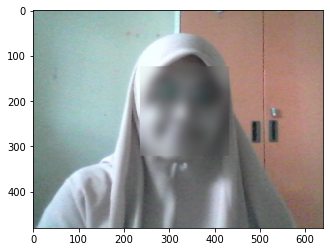

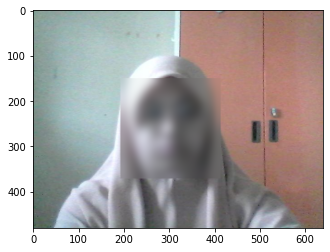

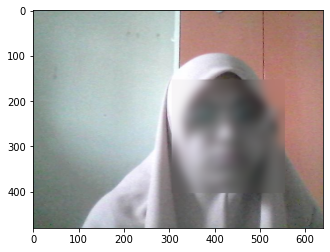

In [54]:

# initialze bounding box to empty
bbox = ''
count = 0 

img1 = cv2.imread(path+"new1.jpg")
img2 = cv2.imread(path+"new2.jpg")
img3 = cv2.imread(path+"new3.jpg")

# create transparent overlay for bounding box
bbox_array = np.zeros([480,640,4], dtype=np.uint8)

img1_rgb = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)

# get face region coordinates
faces1 = face_cascade.detectMultiScale(grayImage1)
faces2 = face_cascade.detectMultiScale(grayImage2)
faces3 = face_cascade.detectMultiScale(grayImage3)

imgBlur1 = img1_rgb.copy()
imgBlur2 = img2_rgb.copy()
imgBlur3 = img3_rgb.copy()

# get face bounding box for overlay
for (x,y,w,h) in faces1:
  bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

  #(thresh, blackAndWhiteImage1) = cv2.threshold(grayImage1, 100, 255, cv2.THRESH_BINARY)
  
  imgBlur1[y:y+h, x:x+w] = cv2.GaussianBlur(img1_rgb[y:y+h, x:x+w],(69,69),10)

for (x,y,w,h) in faces2:
  bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

  #(thresh, blackAndWhiteImage2) = cv2.threshold(grayImage2, 100, 255, cv2.THRESH_BINARY)

  imgBlur2[y:y+h, x:x+w] = cv2.GaussianBlur(img2_rgb[y:y+h, x:x+w],(69,69),10)

for (x,y,w,h) in faces3:
  bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

  #(thresh, blackAndWhiteImage3) = cv2.threshold(grayImage3, 100, 255, cv2.THRESH_BINARY)

  imgBlur3[y:y+h, x:x+w] = cv2.GaussianBlur(img3_rgb[y:y+h, x:x+w],(69,69),10)

bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
# convert overlay of bbox into bytes
bbox_bytes = bbox_to_bytes(bbox_array)
# update bbox so next frame gets new overlay
bbox = bbox_bytes


plt.imshow(imgBlur1)
plt.show()
plt.imshow(imgBlur2)
plt.show()
plt.imshow(imgBlur3)
plt.show()